# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0303 Торопыгин Антон и Тишкин Максим. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Практическая работа потребует знаний: 
- в области дискретизации непрерывного сигнала;
- фильтрации дискретного сигнала с помощью дискретных нерекурсивных и рекурсивных фильтров;
- дискретного преобразования Фурье для дискретных последовательностей;
- организации вычислительных процессов.

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

1) Сформируем дискретный сигнал $x_0, x_1, ..., x_{N-1}$ посредством дискретизации $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включатьв  себя 32 отсчёта (N = 31).
$$x_t  =s(t_k), k = 0, 1, ..., N - 1; t_k - t_{k-1} = T, k = 1, 2, ..., N-1 $$


2) Визуализируем мисходные аналоговый и дискретизированный сигналы. Графики исходного аналогового и дискретизированного сигналов на интервале $k \in [0;31]$ представлены ниже. Из графиков видно, что сигнал периодичен с периодом N = 20.

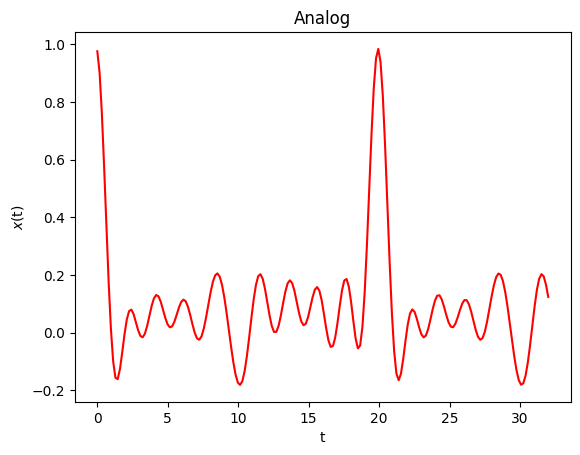

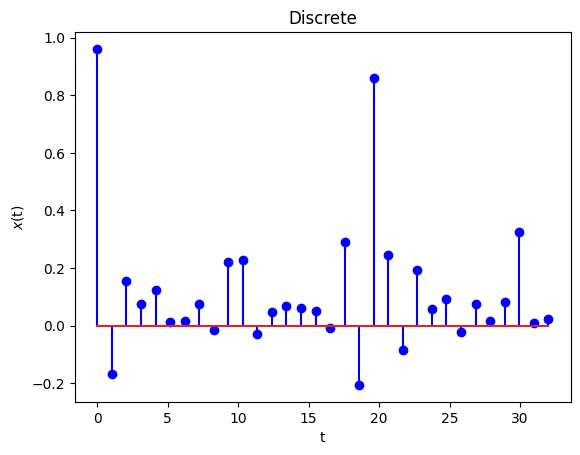

(array([ 0.        ,  1.03225806,  2.06451613,  3.09677419,  4.12903226,
         5.16129032,  6.19354839,  7.22580645,  8.25806452,  9.29032258,
        10.32258065, 11.35483871, 12.38709677, 13.41935484, 14.4516129 ,
        15.48387097, 16.51612903, 17.5483871 , 18.58064516, 19.61290323,
        20.64516129, 21.67741935, 22.70967742, 23.74193548, 24.77419355,
        25.80645161, 26.83870968, 27.87096774, 28.90322581, 29.93548387,
        30.96774194, 32.        ]),
 array([ 0.96121751, -0.16664631,  0.15524304,  0.07422053,  0.12488417,
         0.01093278,  0.0173807 ,  0.07487803, -0.01512515,  0.22239519,
         0.22917889, -0.02956896,  0.04556092,  0.06668749,  0.06079681,
         0.05025106, -0.00984952,  0.28905807, -0.20618885,  0.86027306,
         0.24411931, -0.0860147 ,  0.19411018,  0.0586285 ,  0.09103247,
        -0.02292567,  0.07413834,  0.01713356,  0.08171171,  0.32644791,
         0.00855988,  0.02251339]))

In [16]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft
import matplotlib.pyplot as plt


def get_random(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    us = np.random.random(size=11)/2.
    As = np.random.randint(1, 11, 11)
    x = np.linspace(0, 32, n)
    y = 0
    for w, u, A in zip(ws, us, As):
        y += A*np.cos(w*x + u)

    y = y / np.sum(As)

    return x, y

def task1_2(to_draw_analog = True, to_draw_discrete = True):
    x, y = get_random(200)
    x_disc, y_disc = get_random(32)
    if to_draw_analog: 
        plt.plot(x, y, 'r-')
        plt.ylabel(r'$x$(t)')
        plt.xlabel('t')
        plt.title('Analog')
        plt.show()

    if to_draw_discrete: 
        plt.stem(x_disc, y_disc, linefmt='b-')
        plt.ylabel(r'$x$(t)')
        plt.xlabel('t')
        plt.title('Discrete')
        plt.show()

    return x_disc, y_disc

task1_2()

3) С помощью ДПФ найдём дискретные отсчёты спектра дискретного сигнала и визуализируем их. Рассмотрим фрагмент последовательность ${x_k}$ из отсчётов N = 20. Получим дискретную функцию с периодом $NT$, где Т - период дискретизации:
$$ s(t) = \sum_{k=-\infty}^{+\infty} x_k\delta(t-kT) $$

Спектр $s(t)$ также должен быть периодическим (с периодом $\frac{2\pi}{T}$) и дисретным расстоянием между гармониками $\frac {2\pi} {NT}$.

Поскольку s(t) - периодическая функция, то мы можем разложить её в ряд Фурье с помощью ДПФ. Получим дискретные отсчёты спектра и визуализируем их. Полученный график дискретных отсчётов спектра дискретного сигнала представлен ниже. 

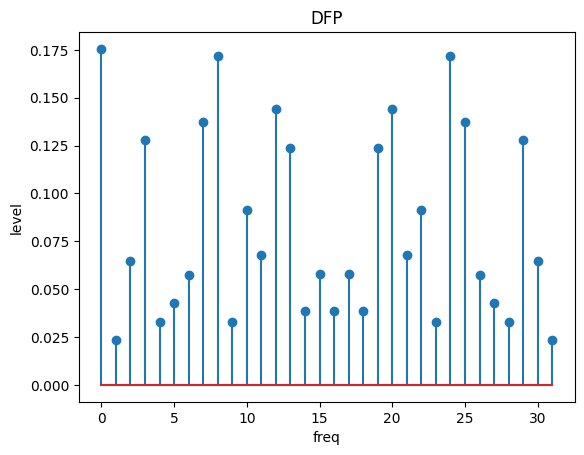

In [17]:
def task3():
    x, y = get_random(32)
    plt.stem(2*np.abs(fft(y))/32)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP')
    plt.show()

task3()

4) Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Передаточные функции равны:
$$H_5(\omega) = \frac {1}{5} (1 + 2cos\omega + 2 cos2\omega ) $$
$$H_9(\omega) = \frac {1}{5} (1 + 2cos\omega + 2cos2\omega + 2cos3\omega + 2cos4\omega )$$

По данным функциям выведем формулу для линейного сглаживания по 5 и 9 точкам:

$$y_{n, 5} = \frac{1}{5} \sum_{k=n-2}^{n+2} x_k $$
$$y_{n, 9} = \frac {1}{9} \sum_{k=n-4}^{n+4} x_k $$

5) Визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом. Полученные графики представлены ниже.

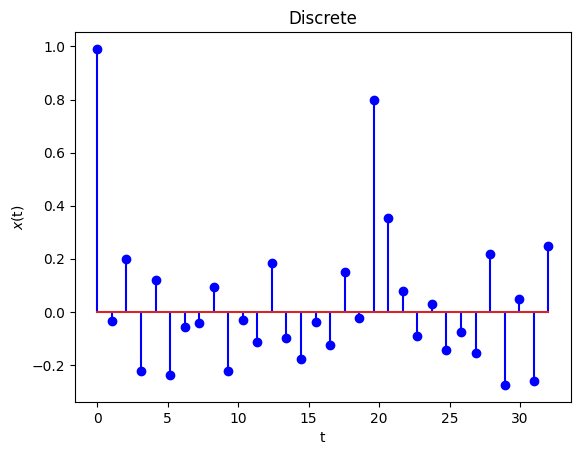

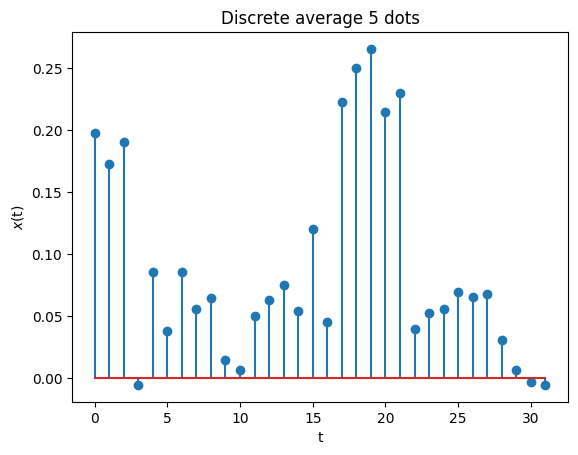

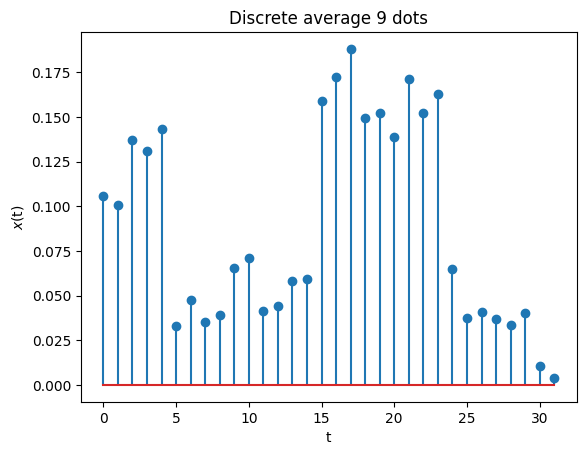

In [18]:
def task4_5():
    task1_2(to_draw_analog = False)
    x, y = get_random(32)
    av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
    av_y_9 = np.convolve(y, np.ones(9), 'same') / 9
    plt.stem(av_y_5)
    plt.ylabel(r'$x$(t)')
    plt.xlabel('t')
    plt.title('Discrete average 5 dots')
    plt.show()
    plt.stem(av_y_9)
    plt.ylabel(r'$x$(t)')
    plt.xlabel('t')
    plt.title('Discrete average 9 dots')
    plt.show()
task4_5()

6) С помощью ДПФ найдём дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отчётами спектра исходного дискретного сигнала.

Дискретные преобразование Фурье:
$$X(n) = \sum_{k=0}^{N-1} y_k e^{-i \frac{2\pi n}{N} k}, n = 0, 1, 2, ..., N-1 $$

Полученные графики представлены ниже. 

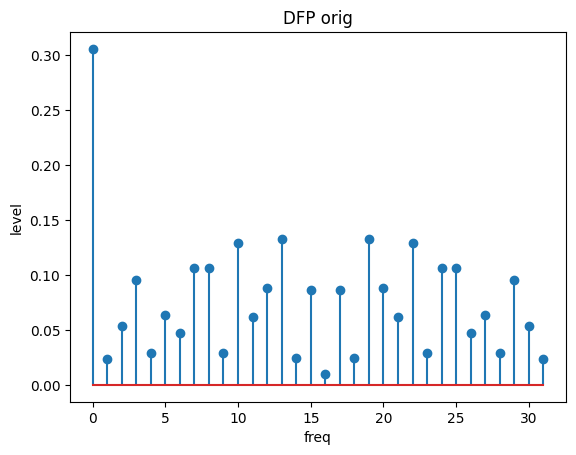

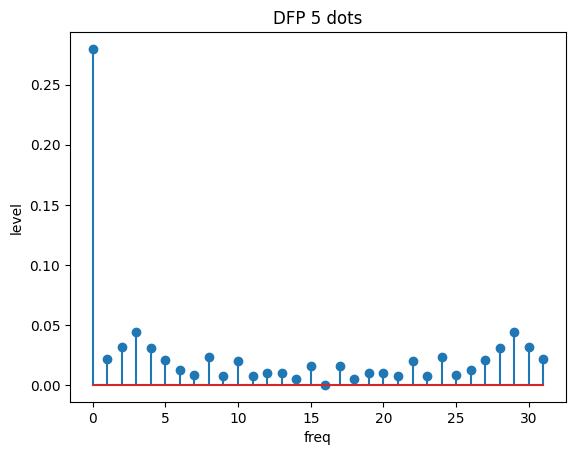

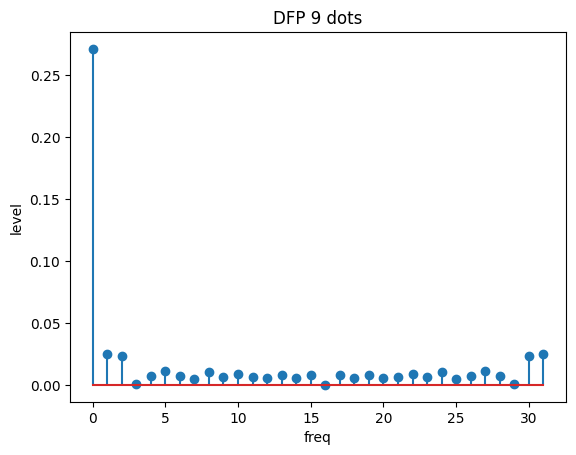

In [19]:
def task6():
    x, y = get_random(32)
    av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
    av_y_9 = np.convolve(y, np.ones(9), 'same') / 9

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_5 = fft(av_y_5)
    f_5 = 2 * np.abs(f_5) / len(f_5)
    f_9 = fft(av_y_9)
    f_9 = 2 * np.abs(f_9) / len(f_9)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_5)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 5 dots')
    plt.show()

    plt.stem(f_9)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 9 dots')
    plt.show()
    pass
task6()

7) Проанализируем результат на соответствие значениям $H(\omega)$.

Преобразование Фуроье сопоставляет непрерывной во времени, бесконечной функции $y_n$ другую, непрерывную по частоте, бесконечную функцию - спектр $X(n)$.

Были получены графики спектра дискретного сигнала до и после линейного сглаживания по 5 и 9 точкам. Графики соответствуют ожиданиям. 

8) Повторим пп. 4-7 для следующих фильтров:

- Сглаживание полиномом 2-ой степени по 5 и 9 точкам.
Для дискретного сигнала применим сглаживание полиномом второй степени по 5 и 9 точкам:

$$y_5(n) = ]frac{1}{35} (-3x_{k-2} + 12x_{k-1} + 17x_k + 12x_{k+1} - 3x_{k+2}) $$
$$y_9(n) = \frac {1}{231} (-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4}) $$

Формула для передаточной функции фильтра:

$$H_5(\omega) = \frac {1}{35} (17+24cos\omega -6cos2\omega) $$
$$H_9(\omega) = \frac {1}{231} (59+108cos\omega + 78cos2\omega + 28cos3\omega - 42 cos4\omega) $$

Полученный график представлен ниже.

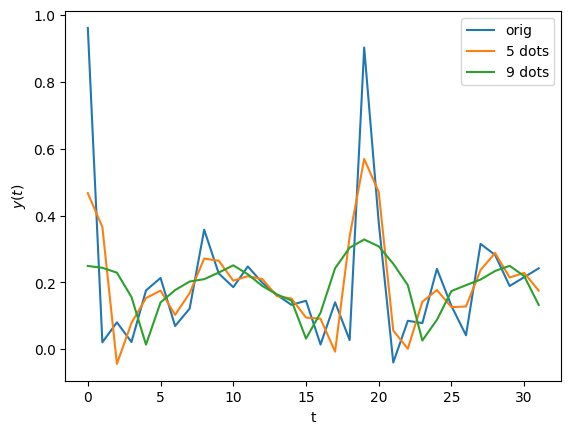

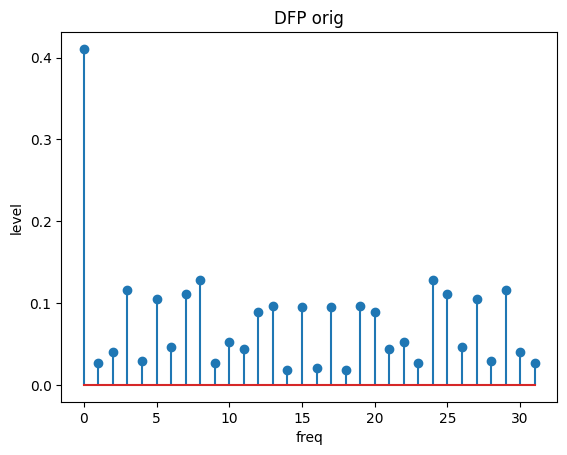

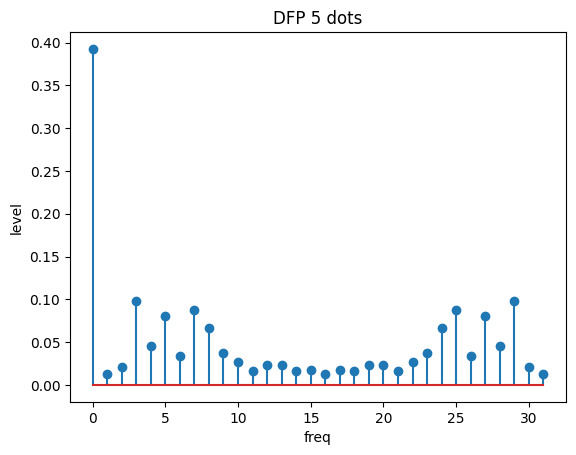

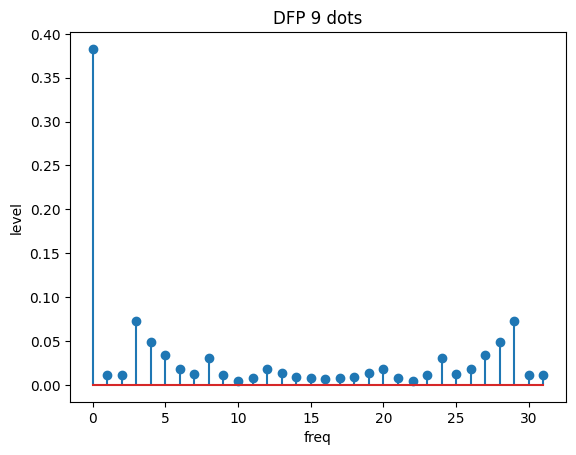

In [20]:
def task8_a():
    x, y = get_random(32)
    av_y_5 = np.convolve(y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
    av_y_9 = np.convolve(y, np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]), 'same') / 231

    plt.plot(y, label='orig')
    plt.plot(av_y_5, label='5 dots')
    plt.plot(av_y_9, label='9 dots')
    plt.xlabel('t')
    plt.ylabel(r'$y(t)$')
    plt.legend()
    plt.show()

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_5 = fft(av_y_5)
    f_5 = 2 * np.abs(f_5) / len(f_5)
    f_9 = fft(av_y_9)
    f_9 = 2 * np.abs(f_9) / len(f_9)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_5)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 5 dots')
    plt.show()

    plt.stem(f_9)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 9 dots')
    plt.show()
task8_a()

- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Для дискретного сигнала применим сглаживание полиномом четвёртой степени по 7 и 11 точкам: 

$$
\begin{aligned}
y_7(n)= & \frac{1}{231}\left(5 x_{k-3}-30 x_{k-2}+75 x_{k-1}+131 x_k+75 x_{k+1}-30 x_{k+2}\right. \\
& \left.\quad+5 x_{k+3}\right) \\
y_{11}(n)= & \frac{1}{429}\left(13 x_{k-5}-45 x_{k-4}-10 x_{k-3}+60 x_{k-2}+120 x_{k-1}+143 x_k\right. \\
& \left.+120 x_{k+1}+60 x_{k+2}-10 x_{k+3}-45 x_{k+4}-13 x_{k+5}\right)
\end{aligned}
$$

Представим формулу для передаточной функции (частотной характеристики) фильтра:
$$
\begin{gathered}
H_7(\omega)=\frac{1}{231}(131+150 \cos \omega-60 \cos 2 \omega+10 \cos 3 \omega) \\
H_{11}(\omega)=\frac{1}{429}(143+240 \cos \omega+120 \cos 2 \omega-20 \cos 3 \omega-90 \cos 4 \omega \\
+26 \cos 5 \omega)
\end{gathered}
$$

Полученные графики изображены ниже.

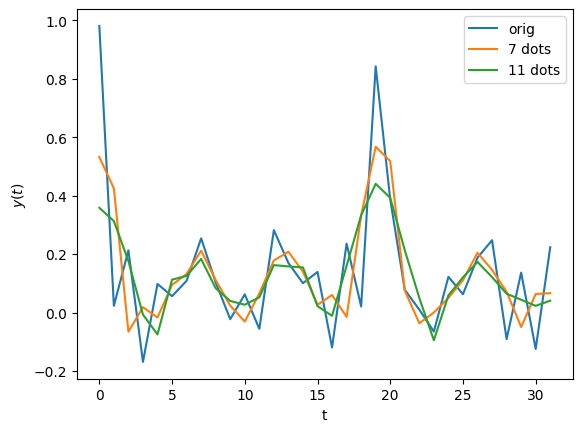

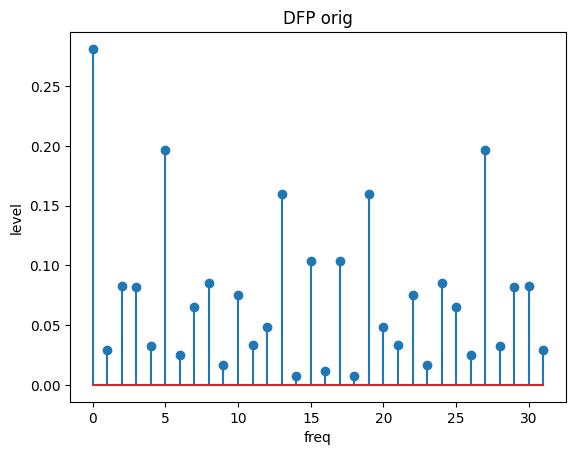

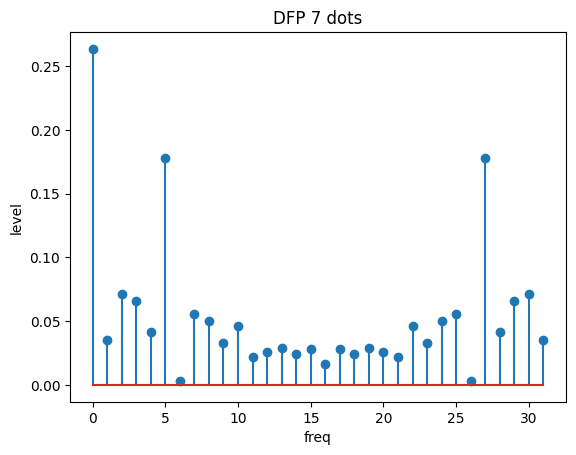

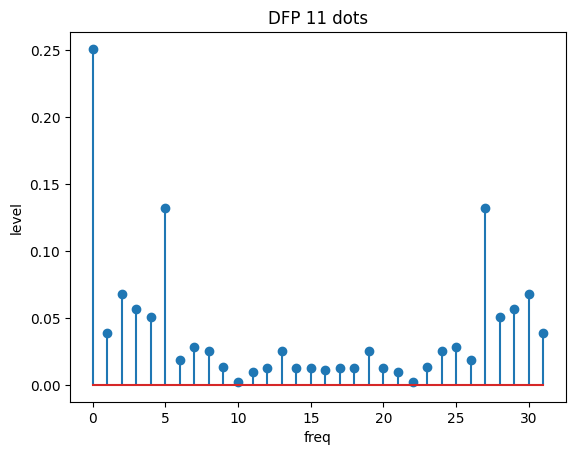

In [21]:
def task8_b():
    x, y = get_random(32)
    av_y_7 = np.convolve(y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
    av_y_11 = np.convolve(y, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

    plt.plot(y, label='orig')
    plt.plot(av_y_7, label='7 dots')
    plt.plot(av_y_11, label='11 dots')
    plt.xlabel('t')
    plt.ylabel(r'$y(t)$')
    plt.legend()
    plt.show()

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_7 = fft(av_y_7)
    f_7 = 2 * np.abs(f_7) / len(f_7)
    f_11 = fft(av_y_11)
    f_11 = 2 * np.abs(f_11) / len(f_11)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_7)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 7 dots')
    plt.show()

    plt.stem(f_11)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 11 dots')
    plt.show()
task8_b()

## Выводы

В ходе рабораторной работы были получены навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье. 